## Global Power Plant Database


### Project Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
Key attributes of the database
The database includes the following indicators:
	
    •	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
    •	`country_long` (text): longer form of the country designation
    •	`name` (text): name or title of the power plant, generally in Romanized form
    •	`gppd_idnr` (text): 10 or 12 character identifier for the power plant
    •	`capacity_mw` (number): electrical generating capacity in megawatts
    •	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    •	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    •	`primary_fuel` (text): energy source used in primary electricity generation or export
    •	`other_fuel1` (text): energy source used in electricity generation or export
    •	`other_fuel2` (text): energy source used in electricity generation or export
    •	`other_fuel3` (text): energy source used in electricity generation or export
    •	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
    •	`owner` (text): majority shareholder of the power plant, generally in Romanized form
    •	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
    •	`url` (text): web document corresponding to the `source` field
    •	`geolocation_source` (text): attribution for geolocation information
    •	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
    •	`year_of_capacity_data` (number): year the capacity information was reported
    •	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
    •	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
    •	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
    •	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
    •	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
    •	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
    •	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
    •	`generation_data_source` (text): attribution for the reported generation information
    •	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
    •	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
    •	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
    •	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
    •	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
    •	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
    •	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
    •	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
    •	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
    •	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 


#### Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

#### Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

<b>Find the dataset link below.

Download Files:</b>

https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv

- <b> Importing require library for performing EDA, Data Wrangling and data cleaning</b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [2]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.head()

No of Rows: 907
No of Columns: 27


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

#### Observation :
Data with 907 rows && 27 column has both object datatypes and float
other_fuel3,estimated_generation_gwh,wepp_id,generation_gwh_2013 ,generation_gwh_2019 are empty columns.

# Statistical Analysis

 <b>  Before Going for Statistical exploration of data, first check integrity of data & Missing value </b>

### Data Integrity Check

<b> Let check if any whitespace,'?' 'NA' or '-' exist in dataset. </b>

In [4]:
df.isin([' ','NA','-','?']).sum().any()

False

#### Comment:
- No whitespace, NA, '-' exist in dataset.

<b> Since dataset is large, Let check for any entry which is repeated or duplicated in dataset. </b>

In [5]:
df.duplicated().sum() # This will check if any duplicate entry or duplicate row with same value exist

0

<b><em> No Duplicate Entry Present in data.

Need to perform data cleaning operation before EDA and ML modelling.Could be identifying:

-  missing data in certain columns.
-  Non relevant data like gppd_idnr,url.

 we will try to do some feature engineering afterwards to modify some columns.</em></b>



<b> Before checking null value and missing value imputation , need to  remove empty columns and non relevalent columns.
    
Columns to be removed are :
    
- estimated_generation_gwh - Empty
- wepp_id - Empty
- other_fuel2 - 98% data missing
- other_fuel3 - Empty 
- owner - More than 60 % data missing
- year_of_capacity_data - Missing data with single unique value
- generation_gwh_2013 - Empty
- generation_gwh_2019  - Empty   
- country - non relevalent info
- country_long - non relevalent info
- gppd_idnr -non relevalent info
- url - No missing value but of no use
</b>

In [6]:
df.drop(columns=["country","country_long",'url','year_of_capacity_data',
                 'gppd_idnr','owner','other_fuel3','other_fuel2',
                 'estimated_generation_gwh','wepp_id','generation_gwh_2013','generation_gwh_2019'],axis=1,inplace=True)

In [7]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
other_fuel1                        709       78.169791
generation_gwh_2014                509       56.119074
generation_gwh_2015                485       53.472988
generation_gwh_2016                473       52.149945
generation_gwh_2017                467       51.488423
generation_gwh_2018                459       50.606395
generation_data_source             458       50.496141
commissioning_year                 380       41.896362
latitude                            46        5.071665
longitude                           46        5.071665
geolocation_source                  19        2.094818
name                                 0        0.000000
capacity_mw                          0        0.000000
primary_fuel                         0        0.000000
source                               0        0.000000


#### Observation :

-   we can impute it with mode for Geolocation source which  is categorical data of category.
- longitude and latitude can be imputed with mean or median of longitude and latitude. 
- As commissioning year for most of industrial powerplant is missing(40%) after checking correlation we will decide to keep or drop this features.
- In generation_data_source 50% data is missing and it doesnot have any importance in our analysis. So it is better to drop this feature.
- Have 5 Different columns of GenerationGW-Hours for year 2014 to 2018.
    
- Other_fuel1 have missing value. 


### Missing value Impuatation

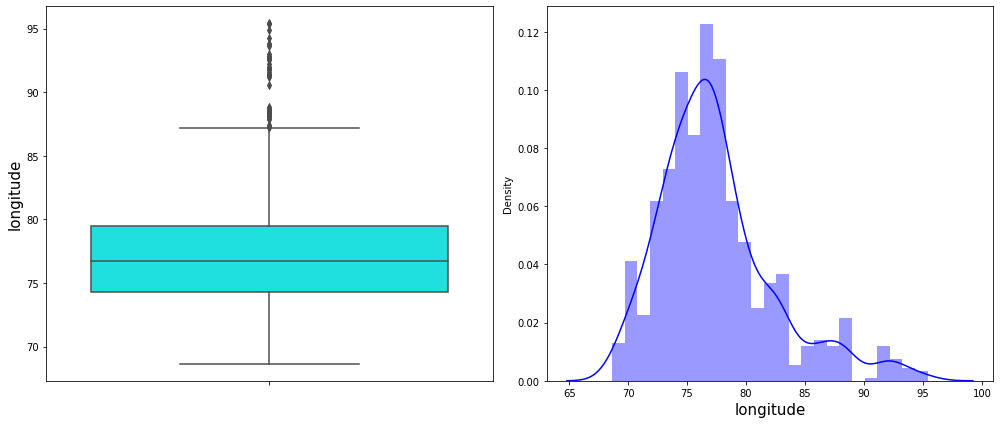

In [8]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='longitude', data=df,color='cyan')
plt.ylabel('longitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['longitude'], color='b')
plt.xlabel('longitude',fontsize=15)
plt.tight_layout()
plt.show()

<b> Based on presense of outliers we will impute longitude we with median. </b>

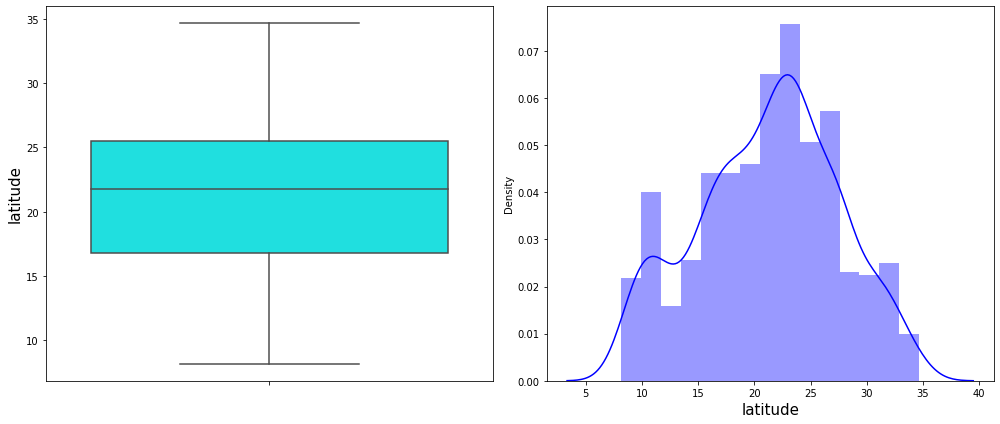

In [9]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='latitude', data=df,color='cyan')
plt.ylabel('latitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['latitude'], color='b')
plt.xlabel('latitude',fontsize=15)
plt.tight_layout()
plt.show()

<b> Based on absense of outliers we will impute latitude we with mean. </b>

In [10]:
# Missing Value Imputation of geolocation with mode
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
# Missing Value Imputation of longitude with median
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
# Missing Value Imputation of latitude with mean
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

In [11]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
other_fuel1                        709       78.169791
generation_gwh_2014                509       56.119074
generation_gwh_2015                485       53.472988
generation_gwh_2016                473       52.149945
generation_gwh_2017                467       51.488423
generation_gwh_2018                459       50.606395
generation_data_source             458       50.496141
commissioning_year                 380       41.896362
name                                 0        0.000000
capacity_mw                          0        0.000000
latitude                             0        0.000000
longitude                            0        0.000000
primary_fuel                         0        0.000000
source                               0        0.000000
geolocation_source                   0        0.000000


### Statstical Matrix

In [12]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,527.000000,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.427103,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.815073,17.082868,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1988.000000,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.281800,76.719500,2001.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.176450,79.206100,2012.000000,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


#### Observation:
- Bigest Powerplant has power generation capacity of 4760 MW.
- In each Generation-GWHours columns Mean is greater than Median.
- Powerplants are located in latitude range of 8.1689 to 34.6490 while longitudal range is 68.64 to 95.4080.
- Oldest powerplant commission date back to 1927 and most recent powerplant is build in 2018. We will check in which timeframe most of powerplants are commission.
- Median of capacity MW is 60 MW. This suggest that there are lot of small capacity powerplant in dataset.

<b><em> We have two different Target feature for regression and classification model. LetStart exploring both Target Feature</em> </b>

## Regression Target feature - Capacity

<b> Before visualing feature let find details about Smallest & Biggest Powerplant </b>

In [13]:
print('Minimum Capacity of Powerplant:',df.capacity_mw.min())
print('Maximum Capacity of Powerplant:',df.capacity_mw.max())

Minimum Capacity of Powerplant: 0.0
Maximum Capacity of Powerplant: 4760.0


In [14]:
df.loc[df.capacity_mw==4760]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
880,VINDH_CHAL STPS,4760.0,24.0983,82.6719,Coal,Oil,2002.0,Central Electricity Authority,WRI,27594.0,29047.0,30015.0,35116.0,35136.0,Central Electricity Authority


In [15]:
df.loc[df.capacity_mw==0]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
829,Tata BP - Electronics City Solar Panel Plant,0.0,12.8491,77.6752,Solar,NaN,NaN,Tata BP Solar India Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN


#### Comment :
- <b> Biggest powerplant in India as per database is VINDH_CHAL STPS with Power generation capacity of 4760 MW.</b> As Name suggest it is Thermal powerplant with Coal as Primary Fuel and alternate fuel is oil. It is commission in year 2002.
- Smallest power plant is mention as Tata BP - Electronics City Solar Panel Plant with capacity of 0 MW. <b>This must be data entry error as If powerplant is commission it cannot have capacity of 0 MW.</b>

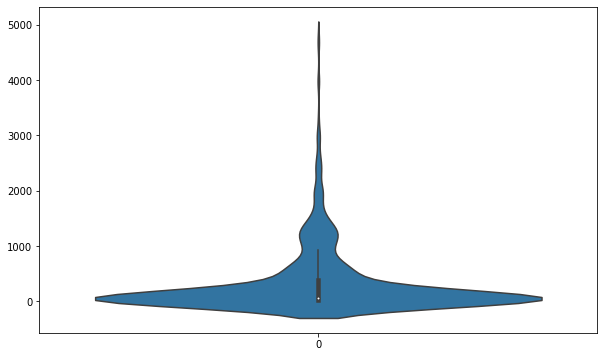

In [16]:
plt.figure(figsize=(10,6))
sns.violinplot(df.capacity_mw)
plt.show()

<b> We can see there are very powerplant of capacity more than 1500 MW. Let check</b>


In [17]:
df.loc[df.capacity_mw >1500].shape

(39, 15)

<b> There only 15 powerplant of capacity more than 1500 MW.</b>

In [18]:
pd.crosstab(df['capacity_mw'],df["primary_fuel"], margins=True).T.style.background_gradient(cmap='summer_r')

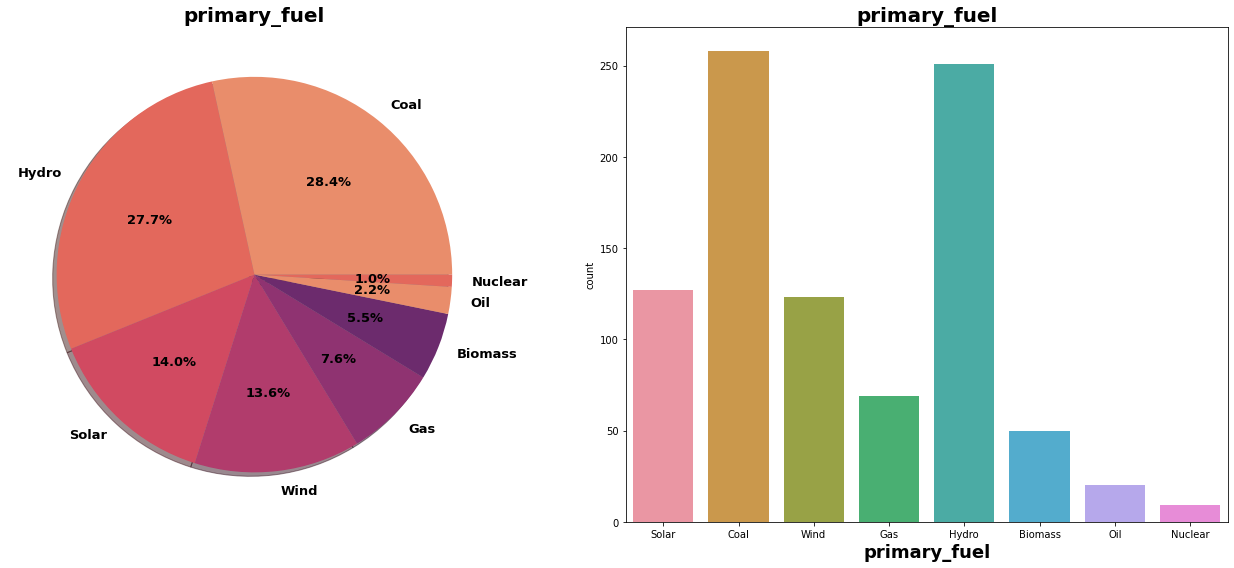

In [19]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('flare')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('primary_fuel', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='primary_fuel',data=df,ax=ax[1])
ax[1].set_title('primary_fuel',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("primary_fuel",fontsize=18,fontweight ='bold')
plt.show()

In [20]:
df.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

#### Comment:
- Maximum Number of powerplant are coal based powerplant followed by Hydro energy based powerplants.
- <b>Around 40 % Power plant are Unconventional powerplant mainly based on Non Renewable energy resorces.</b>
- There are only 9 Nuclear powerplant. Usually these powerplant build for high capacity.<b> It will be interesting to look for capacity of these powerplant.</b>

<b> Let find Total Generation capacity of all powerplant, afterwards we will look for capacity of powerplant according to fuel type.</b> 

In [21]:
print('Total Power Generation Capacity of all Power Plants:',df['capacity_mw'].sum(),'MW')

Total Power Generation Capacity of all Power Plants: 295884.946 MW


<b> India's Total Power Generation Capacity of is 291510.11 MW.

Now Let check sector wise Capacity.
</b>


In [22]:
df["capacity_mw"].groupby(df["primary_fuel"]).agg([sum])

,sum
primary_fuel,
Biomass,1003.260
Coal,205839.220
Gas,25172.506
Hydro,46441.770
Nuclear,8780.000
Oil,1778.840
Solar,2757.500
Wind,4111.850


#### Observation :
<b> Out of Total PowerGeneration Maximum comes from Coal. 

Here comes another interesting observation which we already suspected. Overall Power Generation capacity of Nuclear powerplants is greater than Unconventional Energy sources based powerplant (biomass, wind,solar) combined.</b>

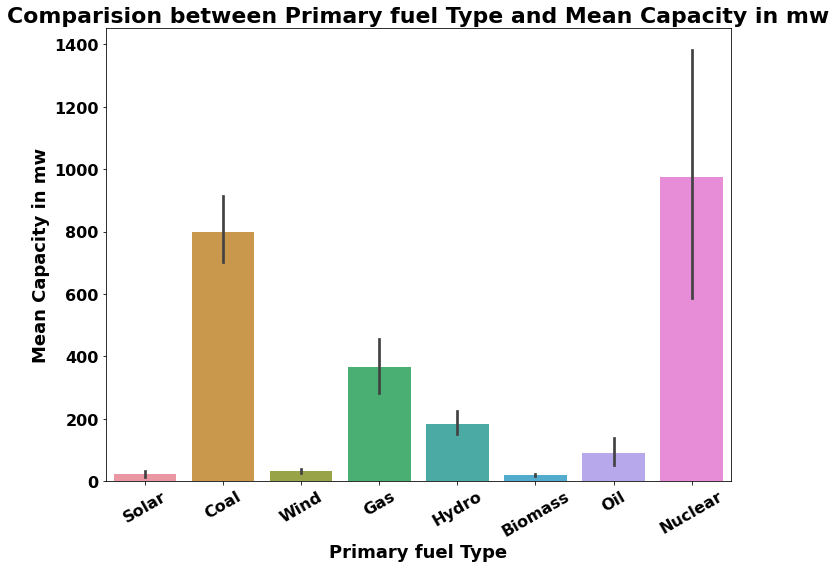

In [23]:
#Lets check the relation between primary_fuel and  Average capacity_mw
plt.figure(figsize = (10,8))
y = df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

<b> Above result is obvious as only 9 Nuclear powerplant so its mean Capacity is higher.</b>

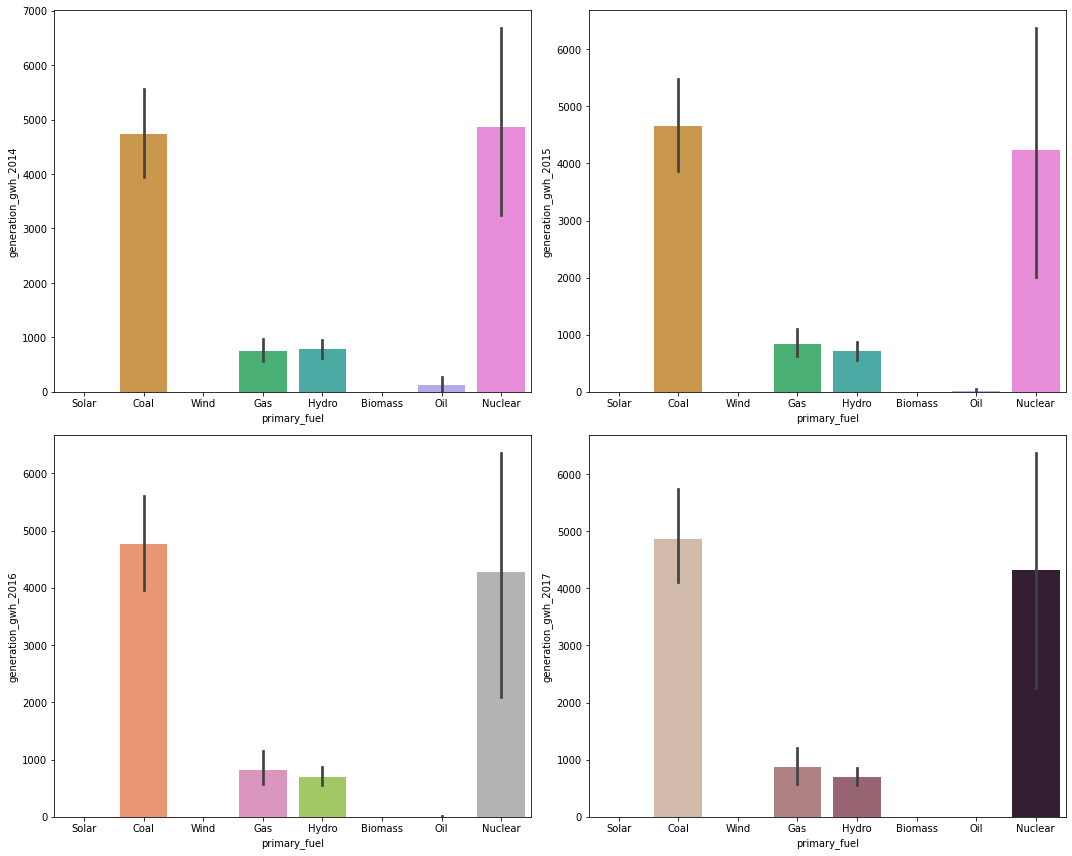

In [24]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2014
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,0],data=df)

# Checking generation growth in 2015
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[0,1],data=df)

# Checking generation growth in 2016
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,0],data=df,palette="Set2")

# Checking generation growth in 2017
sns.barplot(x='primary_fuel',y='generation_gwh_2017',ax=axes[1,1],data=df,palette="ch:.25")
plt.show()


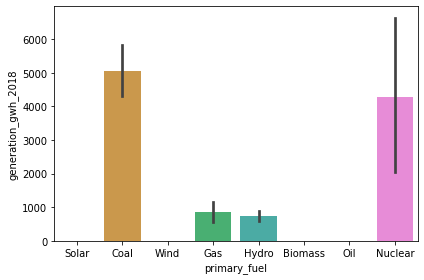

In [25]:
# Checking generation growth in 2018
sns.barplot(x='primary_fuel',y='generation_gwh_2018',data=df)
plt.show()

#### Comment:
- From the graph we can see that Nuclear has high mean electrical generation reports for all the years followed by Coal.
Reason is high efficieny of Nuclear powerplants.
- Other fuel types have very less contribution to power generation.

### Location vs Primary Fuel

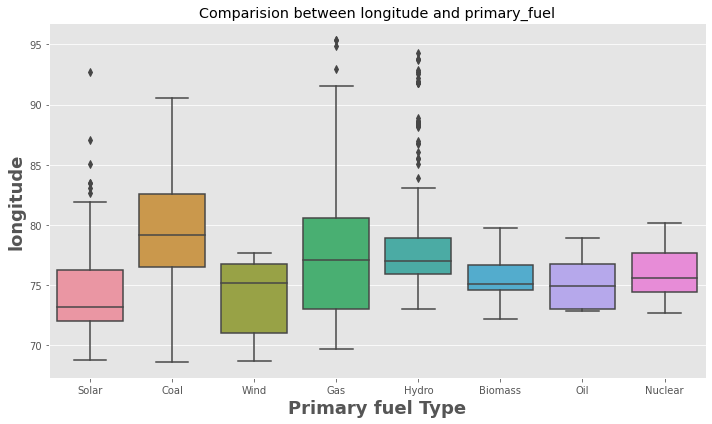

In [26]:
# Let's check how the primary_fuel is reated to longitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(x=df['primary_fuel'],y=df["longitude"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')
plt.show()

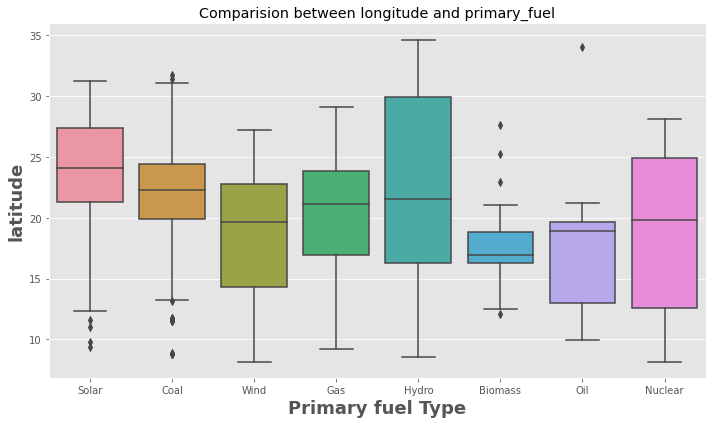

In [27]:
# Let's check how the primary_fuel is reated to Latitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(x=df['primary_fuel'],y=df["latitude"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('latitude',fontsize=18,fontweight ='bold')
plt.show()

#### Observation:
- Location is important feature specially for Nuclear powerplants. These plants are in between 15 to 25 latitude and longitudnal range of 75 to 88 degree.
- We can also see  solar power plantin certain range of latitude and longitude. May be due to sunlight with minimum humidity.

### Location vs Capacity

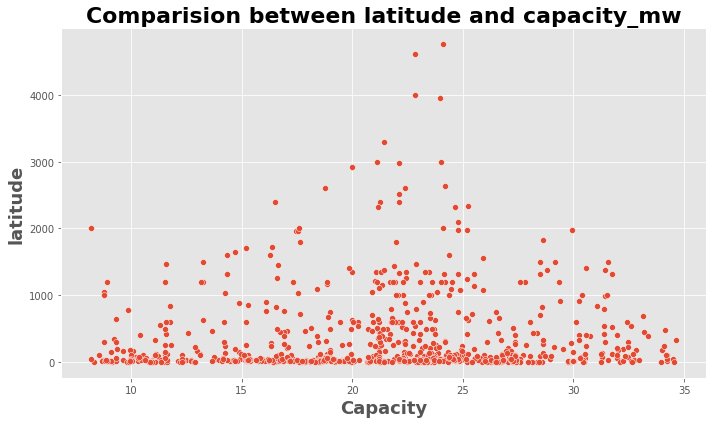

In [28]:
# Let's check how the capacity is reated to latitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw',fontsize=22, fontweight='bold')
a= sns.scatterplot(x=df['latitude'],y=df["capacity_mw"])
a.set_xlabel('Capacity',fontsize=18,fontweight ='bold')
a.set_ylabel('latitude',fontsize=18,fontweight ='bold')
plt.show()

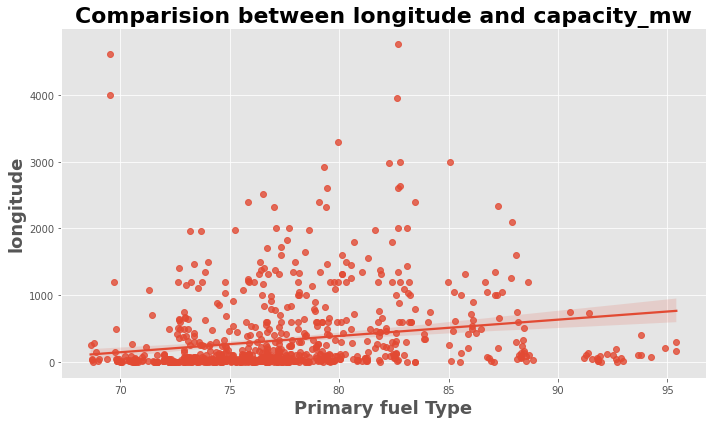

In [29]:
# Let's check how the longitude related to the capacity of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw',fontsize=22, fontweight='bold')
a= sns.regplot(x=df['longitude'],y=df["capacity_mw"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')
plt.show()

<b> Nothing significant insight gain from above plots</b>

### Commission age vs primary fuel

In [30]:
# Lets extract power plant age from commissioning year by subtracting it from the year 2018
df['Power_plant_age'] = 2018 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

In [31]:
print('The oldest powerplant Age :',df.Power_plant_age.max())
print('The youngest powerplant Age :',df.Power_plant_age.min())

The oldest powerplant Age : 91.0
The youngest powerplant Age : 0.0


In [32]:
df.loc[df.Power_plant_age==91]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,Power_plant_age
728,SIVASAMUNDRUM,42.0,12.3082,77.165,Hydro,NaN,Central Electricity Authority,WRI,220.82035,215.3777,144.4143,175.92595,282.76905,Central Electricity Authority,91.0


<b> Oldest Powerplant is SIVASAMUNDRUM which is hydro power based plant with generation capacity of 42 MW.</b>

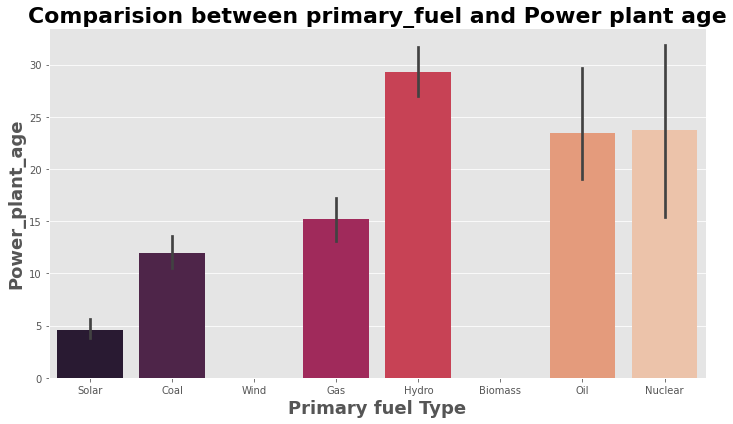

In [33]:
#Lets check how the power plant age affects Fuel Type
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and Power plant age", fontsize=22, fontweight='bold')
a= sns.barplot(x = "primary_fuel", y = "Power_plant_age", data = df,palette="rocket")
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('Power_plant_age',fontsize=18,fontweight ='bold')
plt.show()

<AxesSubplot: title={'center': 'Comparision between Power_plant_age and capacity_mw'}, xlabel='Power_plant_age', ylabel='capacity_mw'>

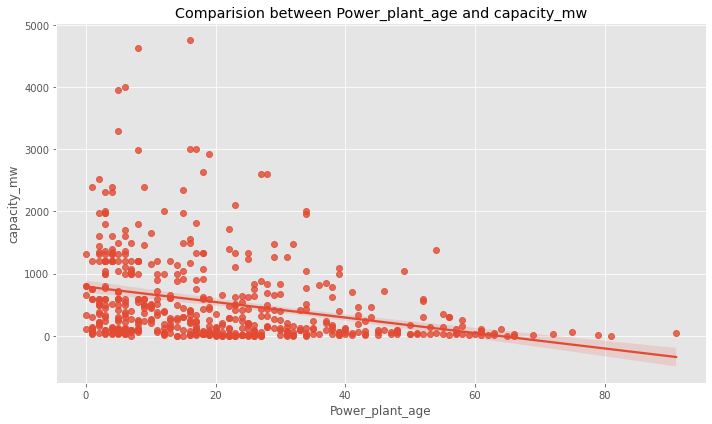

In [34]:
# Let's check how the Power_plant_age affects the capacity of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(x=df['Power_plant_age'],y=df['capacity_mw'])

- There is negative linear relationship between feature and label.
- We can say that the capacity of older plants is very less than compared to the powerplants which are stated recently.

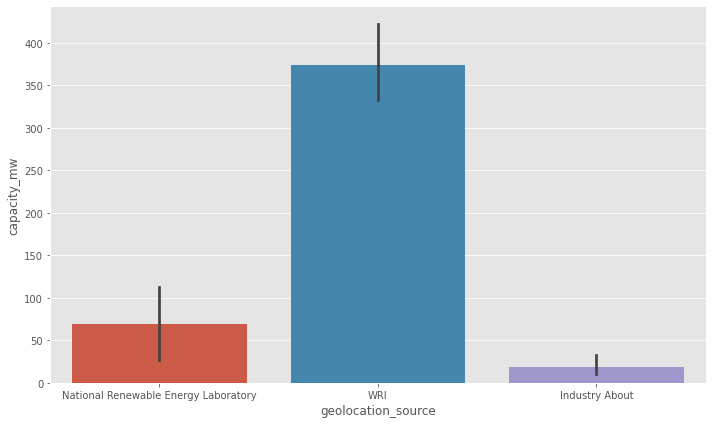

In [35]:
#Lets check the relation between source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

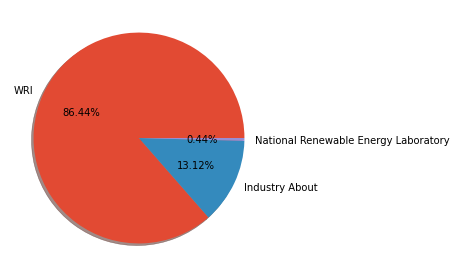

In [36]:
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(6,5))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

The capacity of geological source WRI is maximum which has capacity more than 350 megawatts. The geological source Industry About has less capacity.

## Distribution of features

In [37]:
Numerical=['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015',
           'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018', 'Power_plant_age']

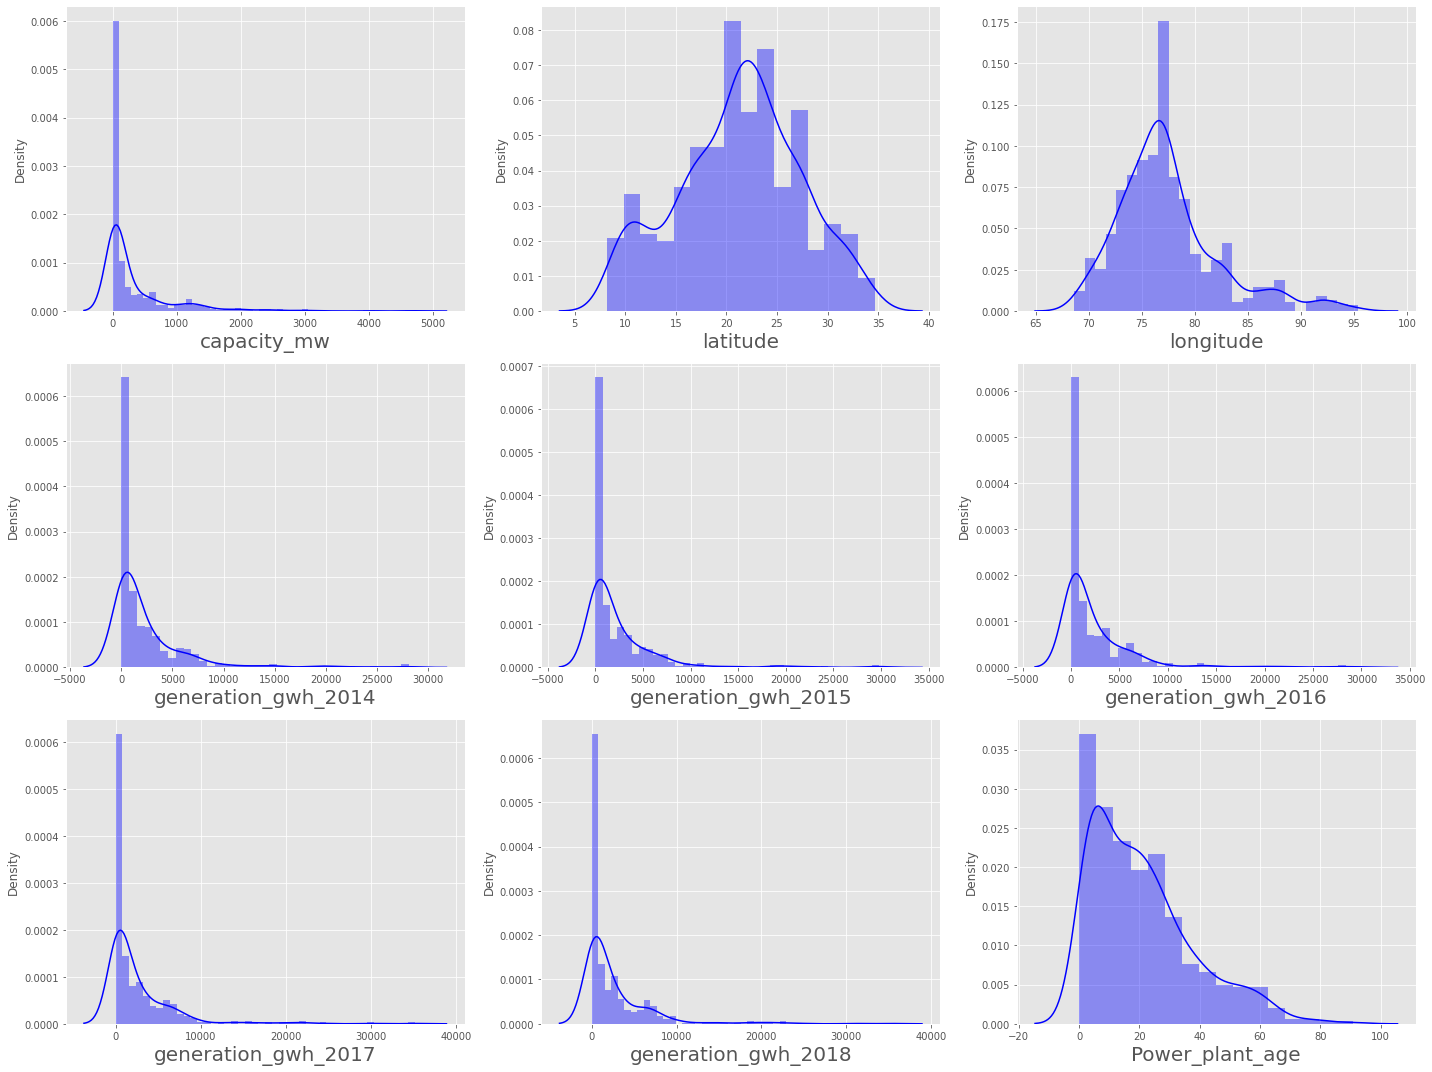

In [38]:
# Checking how the data has been distributed in each column

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### Comment:
- From the above distributionplot we can observe that the data is not normally distributed in all the columns except latitude and longitude.
- In most of the columns the mean is greater than the median which means they are skewed to right.
- We will remove the skewness in all these columns except the label later.

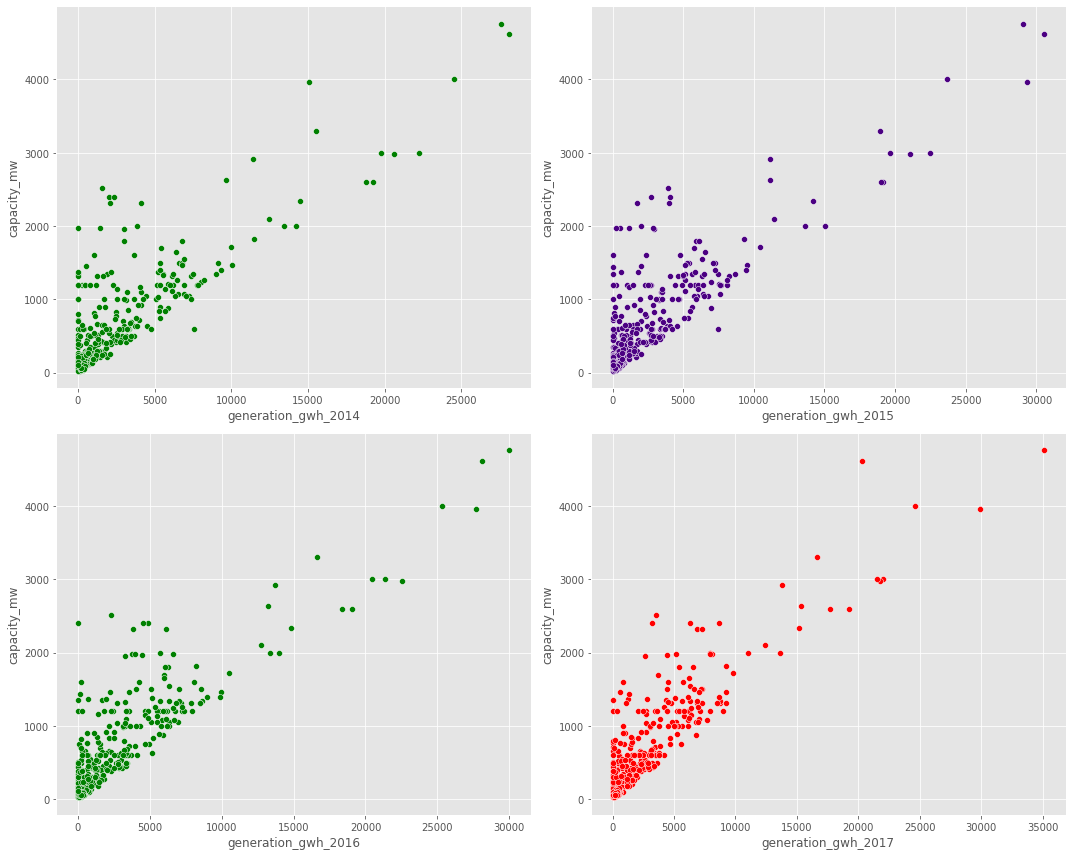

In [39]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2014
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=df,color="g")

# Checking generation growth in 2015
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df,color="indigo")

# Checking generation growth in 2016
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=df,color="g")

# Checking generation growth in 2017
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=df,color="r")
plt.show()


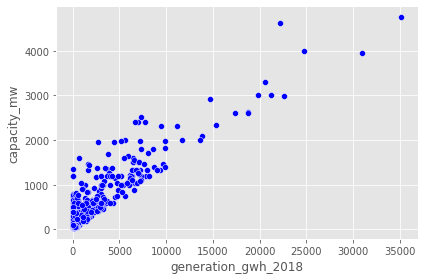

In [40]:

# Checking generation growth in 2018
sns.scatterplot(x='generation_gwh_2018',y='capacity_mw',data=df,color="b")
plt.show()

#### Observation:
- There is a positive linear relationship between the capacity and the electricity generation reported for the years mentioned.
- The plot shows the electricity generation reported for the years 2014,2015,2016,2017,2018 have high capacity of above 1000mw. Also the power generation growth is more than 5000gwh in all the years.
- As the electricity generation growth increases, the capacity of plant also increases.

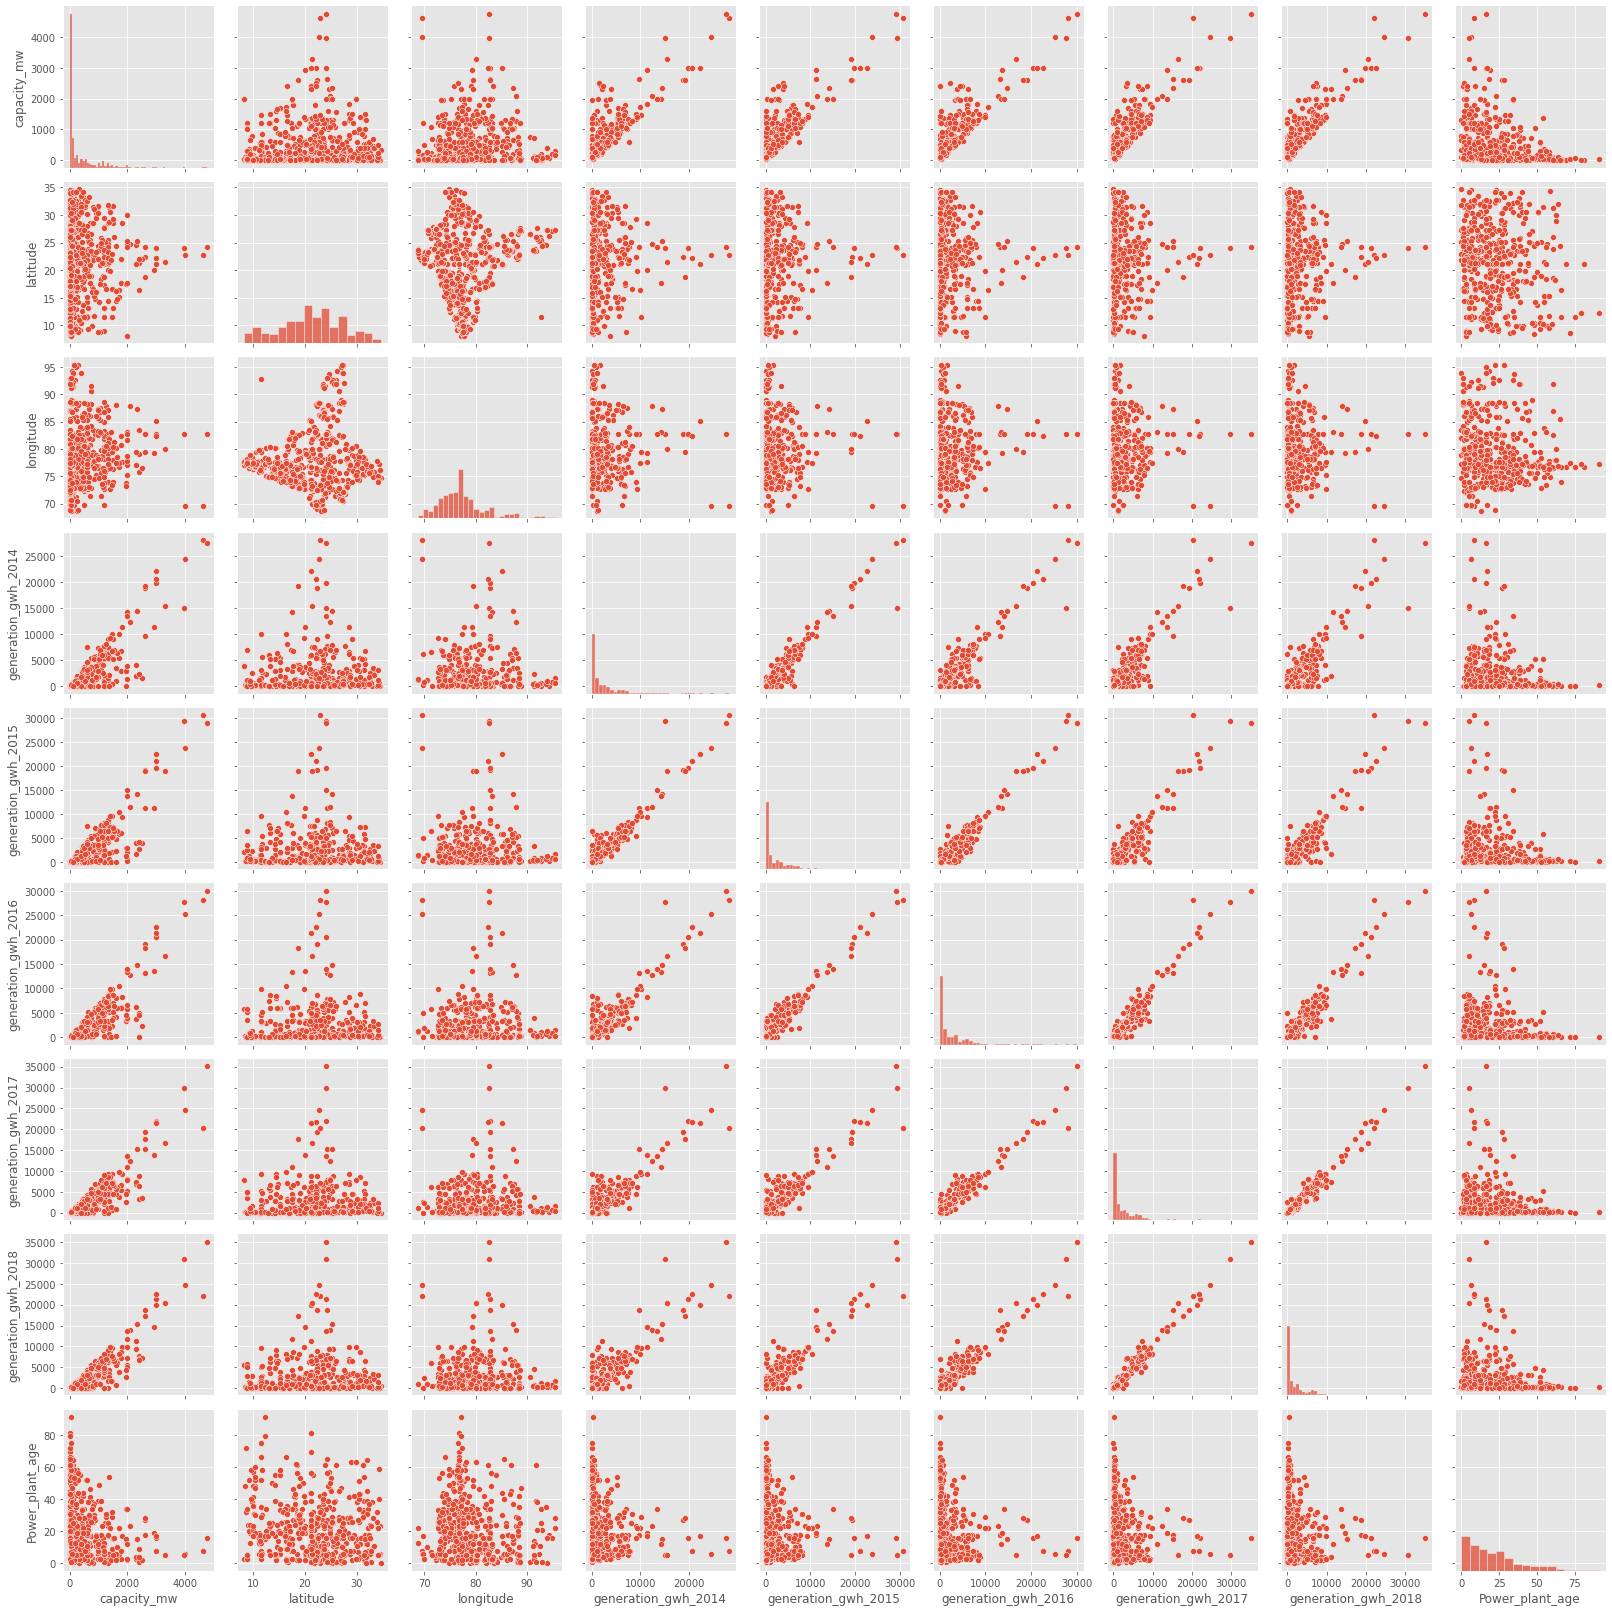

In [41]:
#Checking the pairwise relation between the features and label capacity in megawatt.
sns.pairplot(df)

#### Observations:
- Most features have strong correlation with each other.
- Outliers exist in some of the columns.


## Encoding categorical data

In [42]:
df.drop(columns=['name'],axis=1,inplace=True)

In [43]:
df.drop(columns=['generation_data_source'],axis=1,inplace=True)

In [44]:
Category=['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [45]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,6,3,109,1,NaN,NaN,NaN,NaN,NaN,7.0
1,98.0,24.7663,74.6090,1,3,174,2,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,3,21,2,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,3,22,2,617.789264,843.747,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,3.0


### Outliers detection and removal

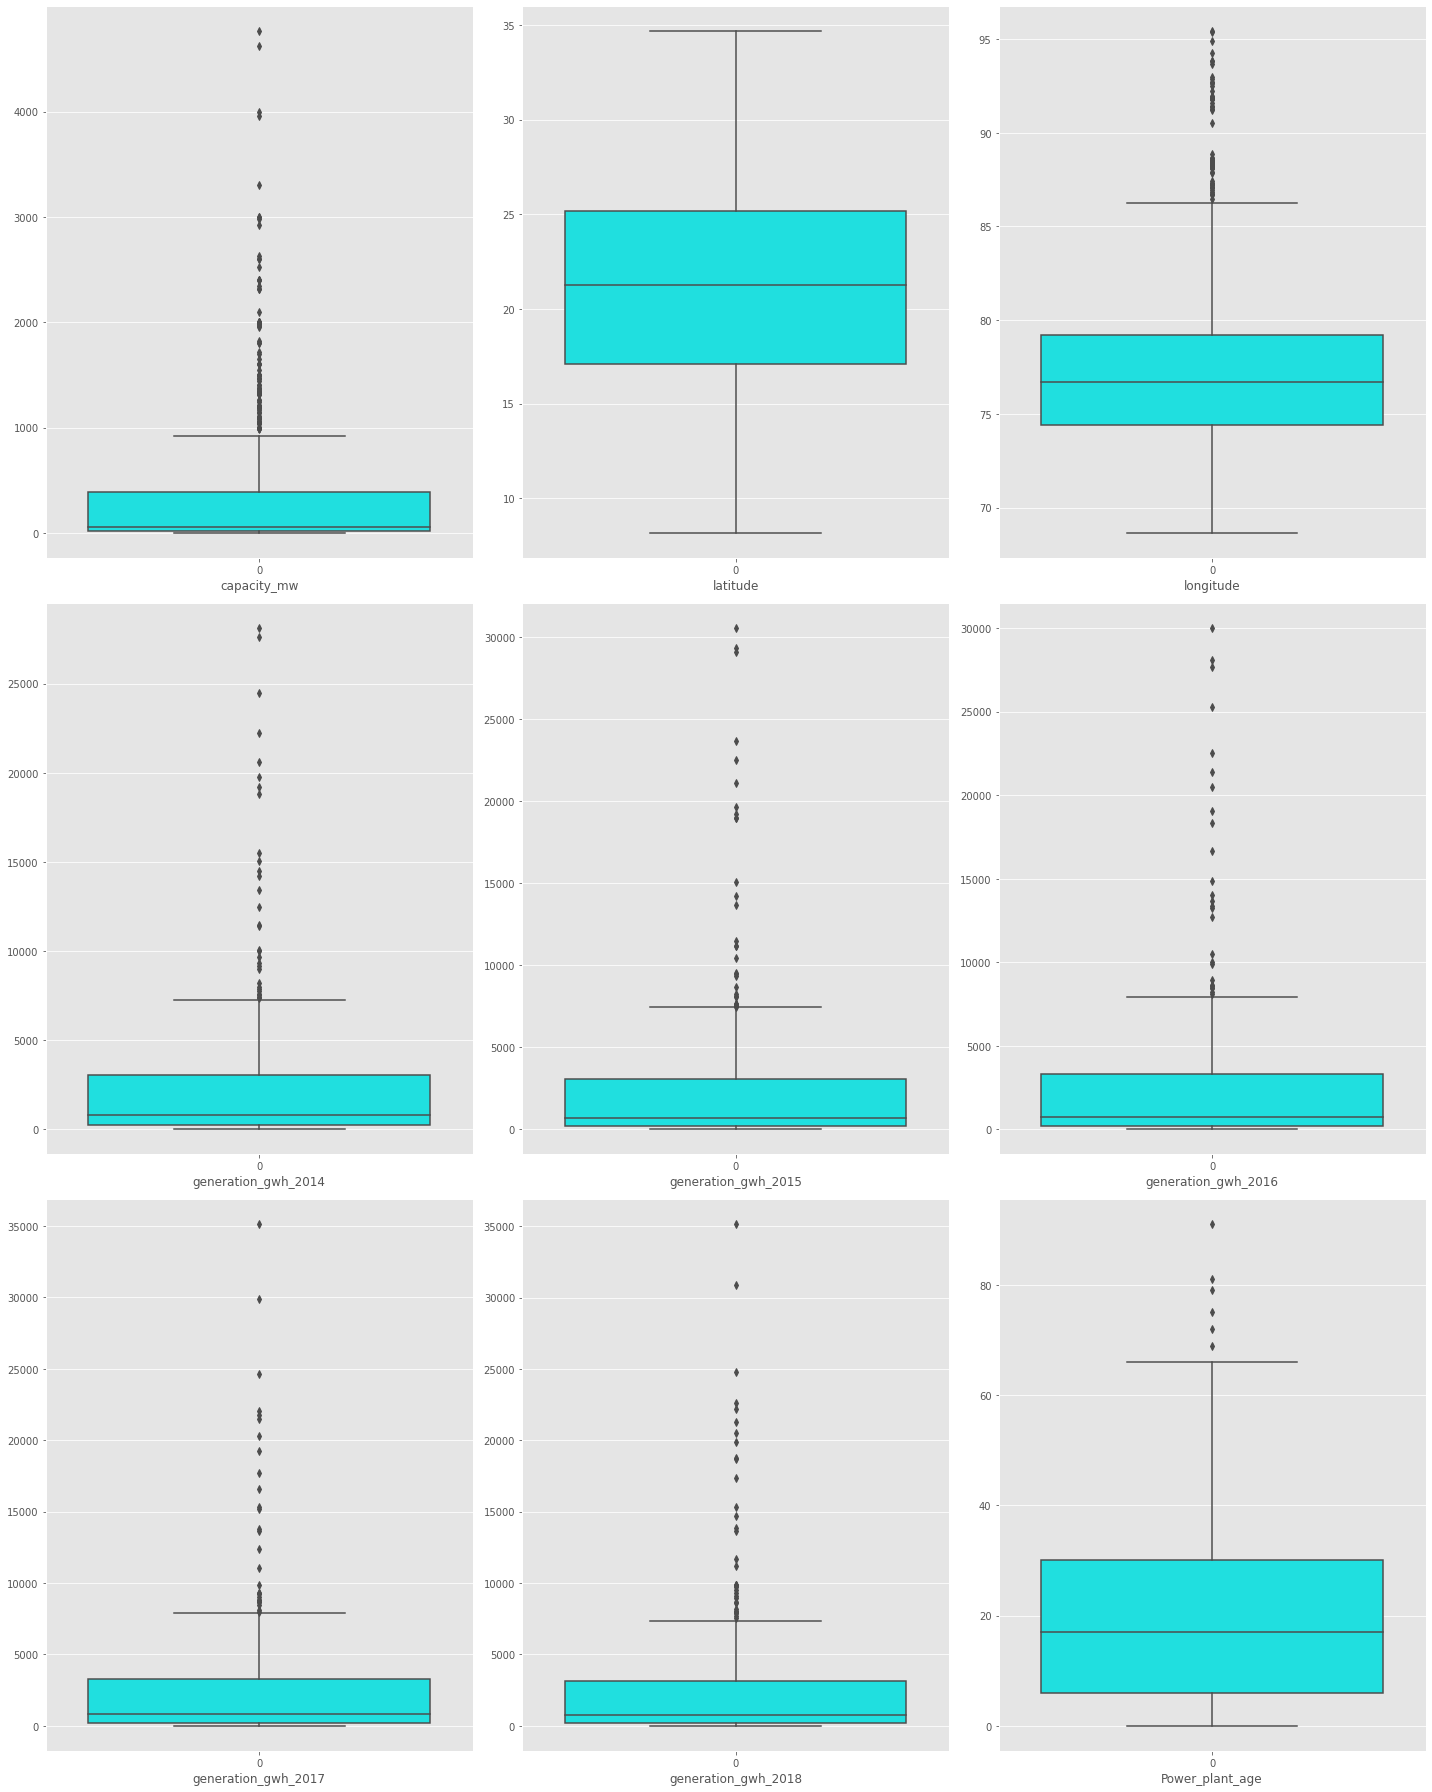

In [46]:
# Identifying the outliers present in numerical columns using boxplot

plt.figure(figsize=(20,25))
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],color='cyan')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

#### Observation :
- There outliers exist in data.
- There are no outliers in lower capping level.
- So we will use Quantile-based Flooring and Capping technique.



In [47]:
# Removal of unnessary columns
df.drop(columns=['source','geolocation_source'],axis=1,inplace=True)

In [48]:
df2=df.copy

In [49]:
df3=df.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             720.00000
latitude                 19.19886
longitude                13.30444
primary_fuel              6.00000
other_fuel1               3.00000
generation_gwh_2014    5295.18000
generation_gwh_2015    5094.78190
generation_gwh_2016    5246.84405
generation_gwh_2017    5631.03285
generation_gwh_2018    6014.95255
Power_plant_age          39.00000
dtype: float64


In [50]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(877, 11)


In [51]:
df3.shape[0]

907

In [52]:
data.shape[0]

877

##### Data Loss

In [53]:
#print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((908-876)/876)*100,'%')
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((df3.shape[0]-data.shape[0])/df3.shape[0])*100,'%')


Percentage Data Loss : 3.307607497243661 %


### Correlation matrix

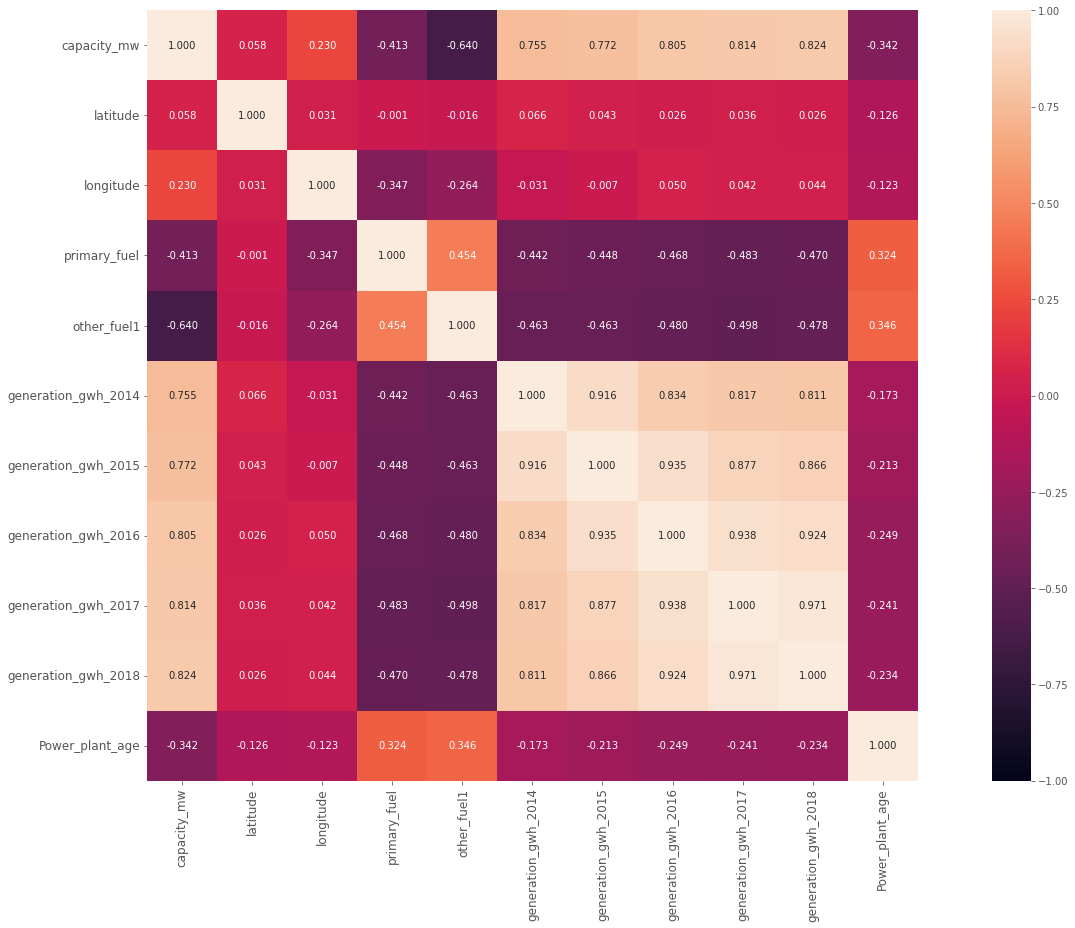

In [54]:
plt.figure(figsize=(21,13))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="rocket")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

- The label capacity_mw is highly positively  correlated with the features generation_gwh_2017,generation_gwh_2016,generation_gwh_2015,generation_gwh_2014,generation_gwh_2013.
- capacity is negatively correlated with ==> primary_fuel, source and Power_plant_age.

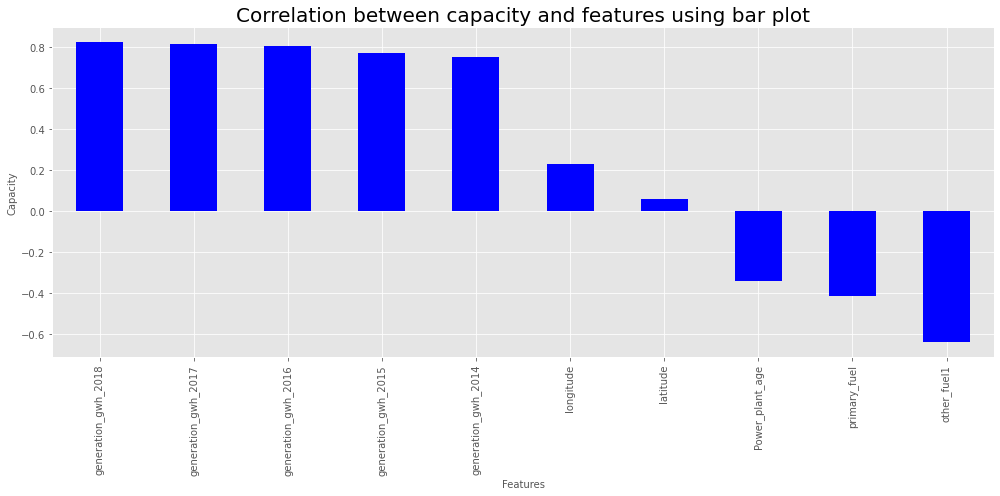

In [55]:
plt.figure(figsize=(14,7))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between capacity and features using bar plot',fontsize=20)
plt.show()

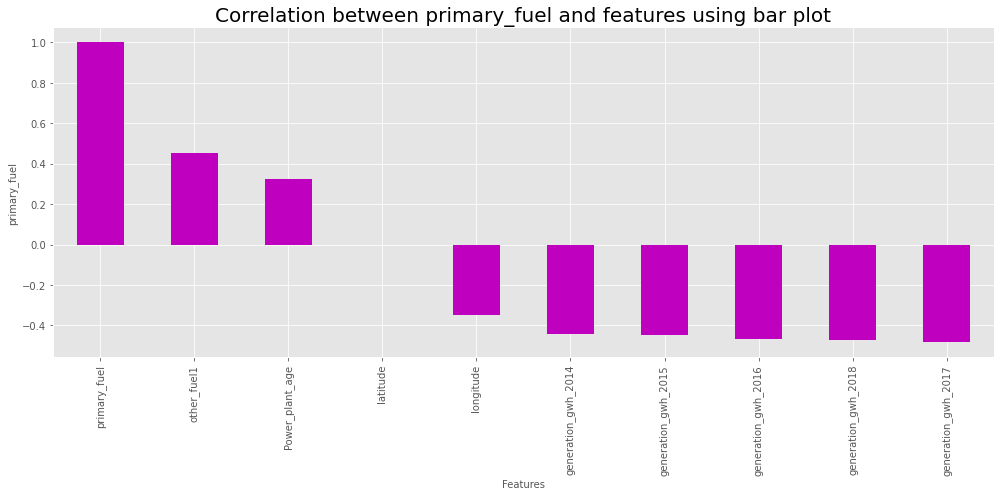

In [56]:
plt.figure(figsize=(14,7))
data.corr()['primary_fuel'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='m')
plt.xlabel('Features',fontsize=10)
plt.ylabel('primary_fuel',fontsize=10)
plt.title('Correlation between primary_fuel and features using bar plot',fontsize=20)
plt.show()

## Skewness

In [57]:
data.skew()

capacity_mw            1.945405
latitude              -0.129362
longitude              1.221398
primary_fuel           0.425807
other_fuel1           -1.831505
generation_gwh_2014    1.610443
generation_gwh_2015    1.536958
generation_gwh_2016    1.594947
generation_gwh_2017    1.489783
generation_gwh_2018    1.532123
Power_plant_age        1.030123
dtype: float64

In [58]:
skew = ['longitude','other_fuel1','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [59]:
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,longitude,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.933334,0.493934,NaN,NaN,NaN,NaN,NaN,-0.803265
1,-0.516718,0.493934,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.413165,0.493934,NaN,NaN,NaN,NaN,NaN,NaN
3,2.166057,0.493934,-0.115824,0.109529,0.134579,-0.043225,-0.071963,-0.178934
4,1.147361,-2.024155,0.916782,1.451544,1.495059,1.348860,1.596280,-1.370997


In [60]:
# checking skewness after using yeo-johnson
data.skew()

capacity_mw            1.945405
latitude              -0.129362
longitude              0.002120
primary_fuel           0.425807
other_fuel1           -1.533254
generation_gwh_2014   -0.134464
generation_gwh_2015   -0.142379
generation_gwh_2016   -0.136447
generation_gwh_2017   -0.155373
generation_gwh_2018   -0.158394
Power_plant_age       -0.075616
dtype: float64

In [61]:
# We will drop other fuel as result of poor correlation and lot of missing values
data.drop("other_fuel1",axis=1,inplace=True)

In [62]:
# Missing Value Imputation of latitude with mean
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

#### Since we have done with EDA NOW its time for removal of missing data 

In [63]:
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)
data.drop("generation_gwh_2018",axis=1,inplace=True)

## Primary Fuel     

## Machine Learning Model Building Classification

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

## Standard Scaling

In [65]:
# Splitting data in target and dependent feature
X = data.drop(['primary_fuel'], axis =1)
Y = data['primary_fuel']

In [66]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [67]:
# Defining the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve,f1_score

lr=LogisticRegression()  # Defining instance for logisticregression

# Finding the best random state value where training accuracy = testing accuracy

Random_State=[]
Training_Accuracy=[]
Testing_Accuracy=[]
Difference=[]

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(X_scale, Y, random_state=i, test_size=.2)    
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)

    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        Random_State.append(i)
        Training_Accuracy.append(accuracy_score(y_train,pred_train)*100)
        Testing_Accuracy.append(accuracy_score(y_test,pred_test)*100)
        Difference.append(abs((accuracy_score(y_test,pred_test)*100)-(accuracy_score(y_train,pred_train)*100)))

RS_table=pd.DataFrame({"Random State":Random_State,"Training Accuracy":Training_Accuracy,"Testing Accuracy":Testing_Accuracy,"Difference":Difference})
print("Table of random state values with training accuracy = testing accuracy")
RS_table.sort_values(by=["Difference"],ascending=True)

Table of random state values with training accuracy = testing accuracy


,Random State,Training Accuracy,Testing Accuracy,Difference
0,121,52.78174,52.840909,0.059169


Observations:

From the above table, as multple random states give same training and testing accuarcy scores, taking one of this from the below code

In [68]:
# Getting the best random state where training accuracy equal to testing accuracy
RSN=RS_table["Random State"][RS_table["Difference"]==RS_table["Difference"].min()]
BRS=np.array(RSN)[0]
BRS

121

In [69]:
# Using the best random state and splitting the data
x_train,x_test,y_train,y_test=train_test_split(X_scale, Y,test_size=0.2,random_state=BRS)

In [70]:
# Training the model and checking  accuracy score with the fixed random state
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print(accuracy_score(y_test,pred_test))

0.5284090909090909


In [71]:
print(classification_report(y_test,pred_test))  # Printing classificatin report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.53      0.74      0.61        42
           2       0.00      0.00      0.00        21
           3       0.59      0.58      0.59        50
           4       0.00      0.00      0.00         4
           6       0.68      0.57      0.62        23
           7       0.41      0.80      0.54        25

    accuracy                           0.53       176
   macro avg       0.32      0.38      0.34       176
weighted avg       0.44      0.53      0.47       176



In [72]:
print(confusion_matrix(y_test,pred_test))  # printing confusion matrix

[[ 0  0  0  2  0  0  9]
 [ 0 31  0  8  0  1  2]
 [ 0 13  0  4  0  1  3]
 [ 0 13  0 29  0  2  6]
 [ 0  1  0  3  0  0  0]
 [ 0  0  0  1  0 13  9]
 [ 0  1  0  2  0  2 20]]


# Cross Validation for Logistic Regression

In [73]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection  import cross_val_score
lss=accuracy_score(y_test,pred_lr)

# Finding the optimized folds from Logistic Regression where the cross validation score is same as model score

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

for j in range(2,11):
    lsscore=cross_val_score(lr,X_scale, Y,cv=j)
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))
CV_table=pd.DataFrame({"No of Folds":No_of_Folds,"Cross Validation Score":CV_Score,"Model Score":Model_Score,"Difference":Difference})  
print("Cross Validation table")
CV_table.sort_values(by=["Difference"],ascending=True)

Cross Validation table


,No of Folds,Cross Validation Score,Model Score,Difference
8,10,52.110763,52.840909,0.007301
7,9,52.108610,52.840909,0.007323
3,5,51.995455,52.840909,0.008455
6,8,51.879691,52.840909,0.009612
1,3,51.764147,52.840909,0.010768
4,6,51.763582,52.840909,0.010773
2,4,51.651100,52.840909,0.011898
5,7,51.531973,52.840909,0.013089
0,2,51.084345,52.840909,0.017566


Observations:

Getting the no. folds where the delta is least between cross validation and model scores from the below code. In this case, selected CV=8 from the above table

In [74]:
# Getting the best no. of folds where the least difference between cross validation score and model score
CVF=CV_table["No of Folds"][CV_table["Difference"]==CV_table["Difference"].min()]
BCV=np.array(CVF)[0]
BCV

10

In [75]:
# Using best CV value and checking the cross validation score again to compare with model score
lsscore_selected=cross_val_score(lr,X_scale, Y,cv=BCV).mean()
print("The CV score is:",lsscore_selected*100,"\nThe accuracy score is:",lss*100)
print("Difference is:",lss-lsscore_selected)

The CV score is: 52.11076280041797 
The accuracy score is: 52.84090909090909
Difference is: 0.007301462904911182


# Other Classification Algorithms

In [76]:
from sklearn.naive_bayes import GaussianNB               # GaussianNB Algorithm
from sklearn.tree import DecisionTreeClassifier          # DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier       # KNeighborsClassifier
from sklearn.linear_model import SGDClassifier           # SGDClassifier
from sklearn.svm import SVC                              # SVC
from sklearn.ensemble import RandomForestClassifier      # RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier        # ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier  # GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier          # AdaBoostClassifier
from xgboost import XGBClassifier                        # XGBClassifier
from sklearn.ensemble import VotingClassifier            # VotingClassifier


# Defining Voting Classifier Models
estimator=[]
estimator.append(('KNC',KNeighborsClassifier()))
estimator.append(('SVC',SVC(gamma='auto',probability=True)))
estimator.append(('DTC',DecisionTreeClassifier()))

# Defining the list with all Algorithms

models=[('GaussianNB()',GaussianNB()),('Decision Tree Classifier()',DecisionTreeClassifier()),
        ('KNeighborsClassifier()',KNeighborsClassifier()),('SGDClassifier()',SGDClassifier()),
        ('SVC()',SVC()),('RandomForestClassifier()',RandomForestClassifier()),
        ('ExtraTreesClassifier()',ExtraTreesClassifier()),('GradientBoostingClassifier()',GradientBoostingClassifier()),
        ('AdaBoostClassifier()',AdaBoostClassifier()),('XGBClassifier()',XGBClassifier()),
        ('VotingClassifier()',VotingClassifier(estimators=estimator,voting="soft"))]

# Defining empty lists
Model=[lr]
CV_Score=[lsscore_selected*100]
Model_Score=[lss*100]
Difference=[lss-lsscore_selected]

# Loop for all algorithms to train the model and for the cross validation
for model in models:
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values from the model using X test
    Model_Score.append(accuracy_score(y_test,pred_test)*100)  # Appending "Accuracy score" to the list
    print("Model:",model[0])
    print("Accuracy Score:")
    print(accuracy_score(y_test,pred_test)*100)               # Printing "accuracy_score"
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,pred_test))                 # Printing "confusion_matrix"
    print("Classification Report:")
    print(classification_report(y_test,pred_test))            # Printing "classification_report"
    print('-'*60)
    
    
    score=cross_val_score(model[1],X_scale, Y,cv=BCV).mean()         # Cross Validation mean score calculation
    CV_Score.append(score*100)                                # Appending "cross validation score" to the list
    Difference.append(abs(accuracy_score(y_test,pred_test)-score)) # Appending "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    # Appending "Model" to the list

# Creating the dataframe with scores and the differences
score_table=pd.DataFrame({'Model':Model,'Model Score':Model_Score,'Cross Validation Score':CV_Score,'Difference':Difference})
print("Table with performance of the models")
score_table.sort_values(by=["Difference"],ascending=True)  # sorting the score table using the difference

Model: GaussianNB()
Accuracy Score:
50.56818181818182
Confusion Matrix:
[[10  0  0  0  0  0  0  1]
 [ 2 29  0  4  0  0  0  7]
 [ 1 10  0  7  0  0  2  1]
 [ 0 10  0 33  0  1  6  0]
 [ 0  1  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 2  0  1  1  0  0  0 19]
 [ 8  0  0  0  0  0  0 17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.91      0.59        11
           1       0.58      0.69      0.63        42
           2       0.00      0.00      0.00        21
           3       0.69      0.66      0.67        50
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00        23
           7       0.38      0.68      0.49        25

    accuracy                           0.51       176
   macro avg       0.26      0.37      0.30       176
weighted avg       0.41      0.51      0.45       176

-------------------------------------

,Model,Model Score,Cross Validation Score,Difference
10,XGBClassifier(),75.568182,75.825496,0.002573
5,SVC(),59.090909,59.392633,0.003017
11,VotingClassifier(),73.295455,72.857889,0.004376
1,GaussianNB(),50.568182,50.060084,0.005081
2,Decision Tree Classifier(),69.886364,70.579937,0.006936
0,LogisticRegression(),52.840909,52.110763,0.007301
8,GradientBoostingClassifier(),76.704545,75.026123,0.016784
6,RandomForestClassifier(),74.431818,76.392372,0.019606
3,KNeighborsClassifier(),67.045455,70.126698,0.030812
7,ExtraTreesClassifier(),75.000000,78.222309,0.032223


## Observations:
    
Based on the comparison between model score and cross validation scores for multiple models, I have considered **"XGBClassifier()"** is the best model due to high model score

I will check with Cross validation score and check for **"XGBClassifier()"**

# CrossValidation :

In [77]:
from sklearn.model_selection import cross_val_score


model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 12),
        RandomForestClassifier(),
        ExtraTreesClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        XGBClassifier(),
        VotingClassifier(estimators=estimator,voting="soft")]

for m in model:
    score = cross_val_score(m,X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.55681818 0.48295455 0.51428571 0.53142857 0.51428571]
Mean Score : 0.5199545454545454
Std deviation : 0.024182027423871873




Cross Validation Score SVC() :

Score : [0.625      0.61931818 0.59428571 0.57714286 0.55428571]
Mean Score : 0.5940064935064935
Std deviation : 0.026319116655030346




Cross Validation Score GaussianNB() :

Score : [0.48863636 0.51704545 0.50285714 0.53142857 0.49142857]
Mean Score : 0.5062792207792208
Std deviation : 0.01607435497428851




Cross Validation Score DecisionTreeClassifier() :

Score : [0.71590909 0.67045455 0.72571429 0.72571429 0.64      ]
Mean Score : 0.6955584415584416
Std deviation : 0.03449592680446255




Cross Validation Score KNeighborsClassifier(n_neighbors=12) :

Score : [0.66477273 0.65909091 0.65714286 0.65714286 0.61714286]
Mean Score : 0.6510584415584415
Std deviation : 0.017186676581419688




Cross Validation Score RandomForestClassifier() :

Score : [0.73863636 0.78409

Observations:

Based on the comparison between model score and cross validation scores for multiple models, I have considered **"XGBClassifier()"** is the best model.

Hyper parameter tuning will be peformed for **"XGBClassifier()"** based on the Cross validation score aswell".

# Hyper Parameter Tuning

In [78]:
# Hyper parameter tuning on XGBClassifier()

from sklearn.model_selection import GridSearchCV

parameters = {   'learning_rate':[0.1,0.01],
               'max_depth': [4,5], 
              'min_child_weight': [5,6], 
              'booster':['dart','gblinear'],
              'gamma': [0.5,1],
            'reg_alpha': [0.5,1],
            'reg_lambda': [0.5,1, 5],
            'base_score': [ 0.5,1],
              'n_estimators': [5,50]}

In [79]:
GCV=GridSearchCV(XGBClassifier(),parameters,cv=10,n_jobs=-1)  # Defining instance for GridSearchCV

In [80]:
GCV.fit(x_train,y_train)   # Apply GridSearchCV to train the model with all combination of parameters

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'base_score': [0.5, 1],
                         'booster': ['dart', 'gblinear'], 'gamma': [0.5, 1],
                         'learning_rate': [0.1, 0.01], 'max_depth': [4, 5],
                         'min_child_weight': [5, 6], 'n_estimators': [5, 50],
                         'reg_alpha': [0.5, 1], 'reg_lambda': [0.5, 1, 5]})

In [81]:
GCV.best_params_   # printing the best parameters

{'base_score': 0.5,
 'booster': 'dart',
 'gamma': 0.5,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 50,
 'reg_alpha': 1,
 'reg_lambda': 1}

In [82]:
# Training the model using best parameters from GridSearchCV and checking the accuracy score, classificaiton report and confusion matrix
ht_model=XGBClassifier(base_score=GCV.best_params_['base_score'],booster=GCV.best_params_['booster'],
                        gamma=GCV.best_params_['gamma'],learning_rate=GCV.best_params_['learning_rate'],
                        max_depth=GCV.best_params_['max_depth'], min_child_weight=GCV.best_params_['min_child_weight'],
                        n_estimators=GCV.best_params_['n_estimators'], reg_alpha=GCV.best_params_['reg_alpha'],
                        reg_lambda=GCV.best_params_['reg_lambda'])
ht_model.fit(x_train,y_train)
pred=ht_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

71.5909090909091
[[ 8  2  0  0  0  0  0  1]
 [ 2 33  2  3  0  0  1  1]
 [ 1  7  6  6  0  1  0  0]
 [ 0  6  1 42  0  1  0  0]
 [ 0  1  1  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 19  4]
 [ 5  1  0  0  0  0  1 18]]
              precision    recall  f1-score   support

           0       0.50      0.73      0.59        11
           1       0.66      0.79      0.72        42
           2       0.60      0.29      0.39        21
           3       0.79      0.84      0.82        50
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         0
           6       0.90      0.83      0.86        23
           7       0.75      0.72      0.73        25

    accuracy                           0.72       176
   macro avg       0.53      0.52      0.51       176
weighted avg       0.71      0.72      0.70       176



In [83]:
score=cross_val_score(ht_model,X_scale, Y,cv=BCV).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,pred)*100)
print("Difference is:",accuracy_score(y_test,pred)-score)

The CV score is: 73.08516196447232 
The accuracy score is: 71.5909090909091
Difference is: -0.014942528735632288


Observations:
    
Hyper Parameter Tuned model: The difference between Cross Validation Score and model score is -0.014

Model with default parameters: The difference between Cross Validation Score and model score is 0.002

As difference is less in the model with defautl parameters We will consider the **XGBClassifier model** with default parameters

# Final Model -Primary Fuel

In [84]:
#models selected ==="XGBClassifier()
print("models selected ===",models[9][1])

Final_model = models[9][1]
x_predict = list(Final_model.predict(x_test))
#creating new dataframe
pd.DataFrame(x_predict).head(10)

models selected === XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)


,0
0,6
1,7
2,1
3,6
4,1
5,1
6,3
7,3
8,3
9,6


# Primary Fuel

# Saving model

In [85]:
#**"XGBClassifier()"** model

print("Model Saved--", Final_model)
import pickle
file = 'powerplant_PrimaryFuel_classification_Final'
save = pickle.dump(Final_model,open('powerplant_PrimaryFuel_classification_Final.pkl','wb'))

Model Saved-- XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)


# Conclusion-Prediction for Primary Fuel

In [86]:
pickled_primary_fuel_predict = pickle.load(open('powerplant_PrimaryFuel_classification_Final.pkl','rb'))
result=pickled_primary_fuel_predict.score(x_test,y_test)
print(result)

primaryFuel_Predicted=pickled_primary_fuel_predict.predict(x_test)
df_predicted = pd.DataFrame(primaryFuel_Predicted, columns =['primaryFuel_Predicted'])
print("\nPrimary Fuel Predicted list based on Test data provided: ")
display(df_predicted)

0.7556818181818182

Primary Fuel Predicted list based on Test data provided: 


,primaryFuel_Predicted
0,6
1,7
2,1
3,6
4,1
...,...
171,1
172,7
173,0
174,3


## Capacity_mw 

## Machine Learning Model Building Regression

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

#### Feature Engineering before proceeding

In [88]:
df2=df.copy()

In [89]:
df3=df2.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             720.00000
latitude                 19.19886
longitude                13.30444
primary_fuel              6.00000
other_fuel1               3.00000
generation_gwh_2014    5295.18000
generation_gwh_2015    5094.78190
generation_gwh_2016    5246.84405
generation_gwh_2017    5631.03285
generation_gwh_2018    6014.95255
Power_plant_age          39.00000
dtype: float64


In [90]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(877, 11)


In [91]:
skew = ['longitude','other_fuel1','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,longitude,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.933334,0.493934,NaN,NaN,NaN,NaN,NaN,-0.803265
1,-0.516718,0.493934,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.413165,0.493934,NaN,NaN,NaN,NaN,NaN,NaN
3,2.166057,0.493934,-0.115824,0.109529,0.134579,-0.043225,-0.071963,-0.178934
4,1.147361,-2.024155,0.916782,1.451544,1.495059,1.348860,1.596280,-1.370997


In [92]:
# We will drop other fuel as result of poor correlation and lot of missing values
data.drop("other_fuel1",axis=1,inplace=True)
# Missing Value Imputation of latitude with mean
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

In [93]:
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)
data.drop("generation_gwh_2018",axis=1,inplace=True)

## Standard Scaling

In [94]:
# Splitting data in target and dependent feature
X = data.drop(['capacity_mw'], axis =1)
target = data['capacity_mw']

In [95]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
features = scaler.fit_transform(X)

In [96]:
features

array([[ 1.14402715e+00, -9.33336422e-01,  1.19409275e+00,
        -1.06596763e+00],
       [ 5.85372945e-01, -5.16719690e-01, -9.93996136e-01,
         6.70359854e-18],
       [ 1.17457544e-01, -2.41316765e+00,  1.63171052e+00,
         6.70359854e-18],
       ...,
       [-9.65981154e-01, -2.48309842e-01,  1.63171052e+00,
         6.70359854e-18],
       [ 5.17322925e-01, -7.73354808e-01, -9.93996136e-01,
         6.70359854e-18],
       [-1.83910720e+00,  2.17524015e-01,  1.63171052e+00,
         6.70359854e-18]])

# Build Model

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

lr=LinearRegression() # instance for linearregression

# Find the best random state value where training r2-score = testing r2-score

Random_State=[]
Training_r2_score=[]
Testing_r2_score=[]
Difference=[]

# Get the random state value where training r2-score = testing r2-score
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        Random_State.append(i)
        Training_r2_score.append(r2_score(y_train,pred_train)*100)
        Testing_r2_score.append(r2_score(y_test,pred_test)*100)
        Difference.append(abs((r2_score(y_test,pred_test)*100)-(r2_score(y_train,pred_train)*100)))

RS_table=pd.DataFrame({"Random State":Random_State,"Training R2 Score":Training_r2_score,"Testing R2 Score":Testing_r2_score,"Difference in R2 Score":Difference})
print("Table of random state values with training r2_score = testing r2_score")
RS_table.sort_values(by=["Difference in R2 Score"],ascending=True)

Table of random state values with training r2_score = testing r2_score


,Random State,Training R2 Score,Testing R2 Score,Difference in R2 Score
3,181,24.290751,24.299591,0.008840
1,122,24.284428,24.293904,0.009476
2,143,24.125083,24.142952,0.017869
4,224,23.433534,23.415649,0.017885
5,397,24.283878,24.308060,0.024182
7,870,24.304075,24.341484,0.037409
0,58,24.243439,24.195178,0.048261
6,753,24.219655,24.160479,0.059176


In [98]:
# best random state where training r2 score equal to testing r2 score
RSN=RS_table["Random State"][RS_table["Difference in R2 Score"]==RS_table["Difference in R2 Score"].min()]
BestRandomState=np.array(RSN)[0]
print("BestRandom State from Linear Regression",BestRandomState)

BestRandom State from Linear Regression 181


In [99]:
# Use the best random state and splitting the data
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=BestRandomState)

In [100]:
# Train the model and checkg  metrics with fixed random state
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print("Model : Linear Regression")
print("R2 Score : ",r2_score(y_test,pred_test))
print("Mean Absolute Error(MAE) : ",mean_absolute_error(y_test,pred_test))
print("Mean Squared Error(MSE) : ",mean_squared_error(y_test,pred_test))
print("Root Mean Squared Error(RMSE) : ",np.sqrt(mean_squared_error(y_test,pred_test)))

Model : Linear Regression
R2 Score :  0.24299590913771163
Mean Absolute Error(MAE) :  237.3596056704574
Mean Squared Error(MSE) :  111067.38947089249
Root Mean Squared Error(RMSE) :  333.2677444201471


# Cross Validation for Linear Regression

In [101]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection  import cross_val_score
lss=r2_score(y_test,pred_lr)

# Find the optimized folds from Linear Regression where the cross validation score is same as model score

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

for j in range(2,11):
    lsscore=cross_val_score(lr,features,target,cv=j)
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))
CV_table=pd.DataFrame({"No of Folds":No_of_Folds,"Cross Validation R2 Score":CV_Score,"Model R2 Score":Model_Score,"Difference in R2 Score":Difference})  
print("Cross Validation Details with Folds")
CV_table.sort_values(by=["Difference in R2 Score"],ascending=True)

Cross Validation Details with Folds


,No of Folds,Cross Validation R2 Score,Model R2 Score,Difference in R2 Score
2,4,23.538558,24.299591,0.007610
4,6,23.448620,24.299591,0.008510
1,3,23.234384,24.299591,0.010652
7,9,23.001191,24.299591,0.012984
3,5,22.748349,24.299591,0.015512
5,7,22.653480,24.299591,0.016461
0,2,22.563975,24.299591,0.017356
6,8,22.280655,24.299591,0.020189
8,10,21.972622,24.299591,0.023270


In [102]:
# Get best no. of folds where the least difference between cross validation score & model score
CVF=CV_table["No of Folds"][CV_table["Difference in R2 Score"]==CV_table["Difference in R2 Score"].min()]
BCV=np.array(CVF)[0]
print("Best Cross Validation score is :",BCV)

Best Cross Validation score is : 4


In [103]:
# Use best CV value and checking the cross validation score again to compare with model score
lsscore_selected=cross_val_score(lr,features,target,cv=BCV).mean()
print("The CV r2 score is:",lsscore_selected*100,"\nThe model r2 score is:",lss*100)
print("Difference is:",lss-lsscore_selected)

The CV r2 score is: 23.5385583474779 
The model r2 score is: 24.299590913771162
Difference is: 0.007610325662932627


# Other Regression Algorithms

In [104]:
from sklearn.tree import DecisionTreeRegressor          # DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor       # KNeighborsRegressor
from sklearn.linear_model import SGDRegressor           # Gradient Descent Regressor
from sklearn.svm import SVR                             # Support Vector Regressor
from sklearn.linear_model import Lasso                  # Lasso Regressor
from sklearn.linear_model import Ridge                  # Ridge Regressor
from sklearn.linear_model import ElasticNet             # Elastic Net Regressor
from sklearn.ensemble import RandomForestRegressor      # RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor        # ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor  # GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor          # AdaBoostRegressor
from xgboost import XGBRegressor                        # XGBRegressor

# list of all Algorithms
models=[('SGDRegressor()',SGDRegressor()),('SVR()',SVR()),('Lasso()',Lasso()),('Ridge()',Ridge()),
        ('RandomForestRegressor()',RandomForestRegressor()),
        ('ExtraTreesRegressor()',ExtraTreesRegressor()),('GradientBoostingRegressor()',GradientBoostingRegressor()),
        ('AdaBoostRegressor()',AdaBoostRegressor()),('XGBRegressor()',XGBRegressor())]

#  empty lists
Model=[lr]
CV_Score=[lsscore_selected*100]
Model_Score=[lss*100]
Difference=[abs(lss-lsscore_selected)]
MAE=[mean_absolute_error(y_test,pred_lr)]
MSE=[mean_squared_error(y_test,pred_lr)]
RMSE=[np.sqrt(mean_squared_error(y_test,pred_lr))]

# Loop  all algorithms to train the model & check for the cross validation
for model in models:
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values from the model using X test
    Model_Score.append(r2_score(y_test,pred_test)*100)        # "R2 Score" to the list 
    MAE.append(mean_absolute_error(y_test,pred_test))         #  "MAE" to the list 
    MSE.append(mean_squared_error(y_test,pred_test))          #  "MSE" to the list 
    RMSE.append(np.sqrt(mean_squared_error(y_test,pred_test)))#  "RMSE" to the list 
    
    score=cross_val_score(model[1],features,target,cv=BCV).mean()         # Cross Validation mean score calculation
    CV_Score.append(score*100)                                #  "cross validation score" to the list
    Difference.append(abs(r2_score(y_test,pred_test)-score)) # "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    #  "Model" to the list

#e dataframe with scores and the differences
score_table=pd.DataFrame({'Model':Model,'Model R2 Score':Model_Score,'Cross Validation R2 Score':CV_Score,'Difference in R2 Score':Difference,'MAE':MAE,'MSE':MSE,'RMSE':RMSE})
print("DataFrame with all model metrics")
score_table[score_table["Difference in R2 Score"]<100].sort_values(by=["Difference in R2 Score"],ascending=True) 

DataFrame with all model metrics


,Model,Model R2 Score,Cross Validation R2 Score,Difference in R2 Score,MAE,MSE,RMSE
5,RandomForestRegressor(),50.940650,50.698622,0.002420,156.814250,71979.715927,268.290357
3,Lasso(),24.260275,23.541636,0.007186,237.304507,111125.074189,333.354277
1,SGDRegressor(),24.281302,23.551509,0.007298,237.215684,111094.223034,333.308000
4,Ridge(),24.299204,23.540035,0.007592,237.362055,111067.956810,333.268596
0,LinearRegression(),24.299591,23.538558,0.007610,237.359606,111067.389471,333.267744
2,SVR(),-19.241478,-17.010387,0.022311,227.923017,174950.702219,418.271087
7,GradientBoostingRegressor(),50.745702,48.401852,0.023439,166.905895,72265.742603,268.822883
6,ExtraTreesRegressor(),53.160589,48.685731,0.044749,152.356563,68722.628093,262.150011
9,XGBRegressor(),33.879883,41.410619,0.075307,189.051629,97011.216399,311.466236
8,AdaBoostRegressor(),51.635648,28.705868,0.229298,181.844809,70960.017030,266.383215


Observations:

Best model( **RandomForestRegressor**) for this dataset because of:

    1.highest R^2 score

    2.lowest root mean squared error

Out of all algorithms checked,**RandomForestRegressor** model is selected for hyper parameter tuning

as the difference between model and cross-validation score is also less apart from LinearRegressior but due to high model score& CV score , **RandomForestRegressor** is chosen  

# Hyper Parameter Tuning

In [105]:
#Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
# Defining parameters for  RandomForestRegressor
parameters = {
            'n_estimators':[50,60],
             'max_depth': [10,20],
             'criterion':['mse','mae'],
             'min_samples_leaf': [5,15],
             'min_samples_split':[5,10],
             'max_features':["sqrt","log2"]
            }

GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=BCV)  
GCV.fit(x_train,y_train)   #  GridSearchCV to train model with all combination of parameters
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 50}

In [106]:
Rfg=RandomForestRegressor(criterion=GCV.best_params_['criterion'],max_depth=GCV.best_params_['max_depth'],
                          max_features=GCV.best_params_['max_features'],
                        min_samples_leaf=GCV.best_params_['min_samples_leaf'],min_samples_split=GCV.best_params_['min_samples_split'],
                        n_estimators=GCV.best_params_['n_estimators'])
Rfg.fit(x_train,y_train)
Rfg.score(x_train,y_train)
pred_decision=Rfg.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print("R2 Score:",rfs*100)

rfscore=cross_val_score(Rfg,features,target,cv=2)
rfc=rfscore.mean()
print("Cross Val Score:",rfc*100)
print("Difference is:",r2_score(y_test,pred_decision)-rfc)

R2 Score: 56.32658217575379
Cross Val Score: 47.423217542264574
Difference is: 0.08903364633489219


## Observations:

Hyper Parameter Tuned model: The difference between Cross Validation Score and model score is 0.096

Model with default parameters: The difference between Cross Validation Score and model score is 0.03

As difference is less in the model with default parameters We will consider the **RandomForestRegressor** model with default parameters

In [107]:
#models selected ===RandomForestRegressor()
print(models[4][1])
x_predict = list(models[4][1].predict(x_test))
#creating new dataframe
pd.DataFrame(x_predict).head(10)

RandomForestRegressor()


,0
0,402.655000
1,144.612633
2,4.596667
3,9.273000
4,37.087000
5,37.403500
6,11.932850
7,75.762000
8,845.430000
9,957.610000


In [108]:
powerPlant_newdata = [[ 5.85372945e-01, -5.16719690e-01, -9.93996136e-01, 6.70359854e-18]]
        

#Predict Powerplant_CapacityMW for new Data
#model ===SVR()
Powerplant_CapacityMW_predict =models[4][1].predict(powerPlant_newdata)
print(Powerplant_CapacityMW_predict)

[37.087]


# Powerplant_CapacityMW

# Save Model

In [109]:
#RandomForestRegressor()
print("Model Saved--", models[4][1])
import pickle
file = 'Powerplant_CapacityMW_Final'
save = pickle.dump(models[4][1],open('Powerplant_CapacityMW_Final.pkl','wb'))

Model Saved-- RandomForestRegressor()


# Conclusion-Powerplant_CapacityMW

In [110]:
pickled_CapacityMW_predict = pickle.load(open('Powerplant_CapacityMW_Final.pkl','rb'))
result=pickled_CapacityMW_predict.score(x_test,y_test)
print(result)

Powerplant_CapacityMW_Predicted=pickled_CapacityMW_predict.predict(x_test)
df_predicted = pd.DataFrame(Powerplant_CapacityMW_Predicted, columns =['Powerplant_CapacityMW_Predicted'])
print("\nPowerplant_CapacityMW_Predicted list based on Test data provided: ")
display(df_predicted)

0.5094064992878022

Powerplant_CapacityMW_Predicted list based on Test data provided: 


,Powerplant_CapacityMW_Predicted
0,402.655000
1,144.612633
2,4.596667
3,9.273000
4,37.087000
...,...
171,327.966000
172,1060.105000
173,1279.070000
174,36.712589


## Conclusion

We will use **XGBClassifier** for predicting Primary Fuel

We will use **RandomForestRegressor** for predicting Capcity MW